# 파이프라인

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

X = iris.data[:,[2,3]] #꽃잎의 길이, 넓이
y = (iris.target ==2).astype(float)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(random_state=42))
])

# 학습
svm_clf.fit(X,y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [4]:
# 예측
print(svm_clf.predict([[5.5,1.7]]))

[1.]


### C값 변환
- c=1 -> 마진을 넓게 만드는 것 우선시, 약간의 오류 허용
- c=100 -> 마진이 좁아도 ㄱㅊ으니, 오류 허용하지 않음. 값이 클수록 더 엄격하게 오류를 허용하지 않음

In [5]:
# C값 변환
svm_clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,random_state=42))
])

svm_clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=100,random_state=42))
])


# 학습
svm_clf1.fit(X,y)
svm_clf2.fit(X,y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [6]:
# 예측
print(svm_clf1.predict([[5.5,1.7]]))
print(svm_clf2.predict([[5.5,1.7]]))

[1.]
[1.]


In [7]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

[1.]


c:\python_src\.venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


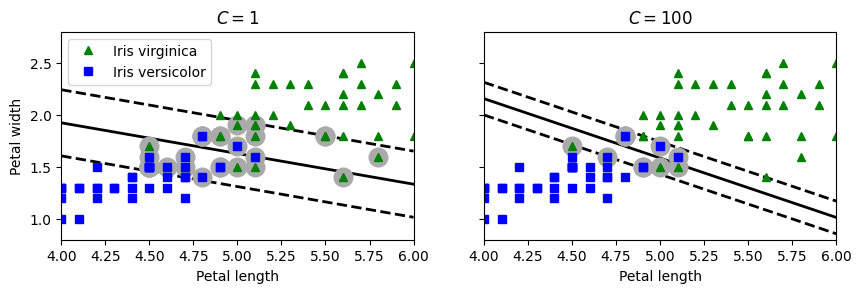

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:,[2,3] ]  # 꽃잎의 길이 너비
y = (iris.target == 2).astype(float)

svm_clf =  Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(random_state=42))
])
svm_clf.fit(X,y)

# 예측
print( svm_clf.predict( [[5.5, 1.7]] ) )
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일되지 않은 파라미터로 변환
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (그림 표시용)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


# 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title("$C = {}$".format(svm_clf1.C))
plt.axis([4, 6, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.title("$C = {}$".format(svm_clf2.C))
plt.axis([4, 6, 0.8, 2.8])

plt.show()

,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


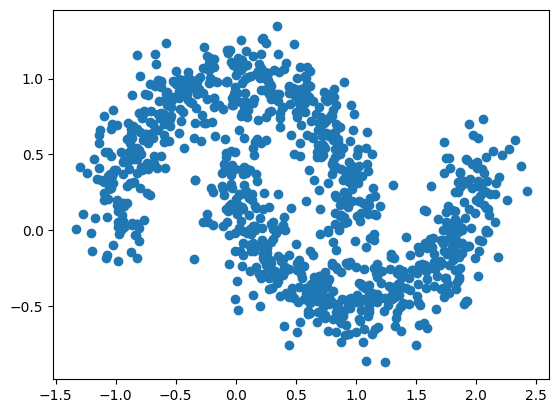

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# 달 모양의 비선형 데이터 생성
X,y = make_moons(n_samples=1000, noise=0.15, random_state=42)
plt.scatter(X[:,0], X[:,1])

poly = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10,random_state=42))
])

poly.fit(X,y)

### 커널 트릭
- 실제로 데이터를 고차원으로 변환하지 않으면서, 동일한 효과를 발생

In [ ]:
from sklearn.svm import SVC

poly_kernel = Pipeline([
                    ('scaler',StandardScaler()),
                    ('svm_clf',SVC(kernel='poly',degree=3,coef0=3,C=5))
])
poly_kernel.fit(X,y)


poly_kernel_100 = Pipeline([
                    ('scaler',StandardScaler()),
                    ('svm_clf',SVC(kernel='poly',degree=5,coef0=5,C=5)) 
])
poly_kernel_100.fit(X,y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,5
,gamma,'scale'


NameError: name 'plot_predictions' is not defined

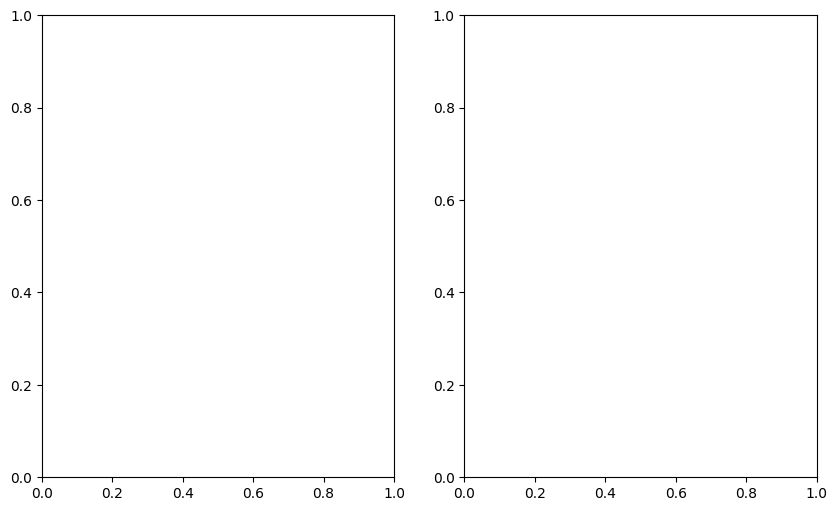

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
plt.sca(ax[0])

plot_predictions(poly_kernel,[-1.5,2.5,-1,1.5])
plot_predictions(poly_kernel_100,[-1.5,2.5,-1,1.5])